# 🩺 Diabetes Prediction Using Machine Learning  

## 📌 Project Overview  
This project utilizes **Machine Learning** to predict whether a person is likely to have **diabetes** based on medical data. It involves **data preprocessing, model training, evaluation, and prediction visualization** using Python.  

## 🔍 Workflow  
1. **Importing Libraries**: Load necessary Python libraries for data handling, visualization, and model training.  
2. **Loading the Dataset**: Read the diabetes dataset and explore its structure.  
3. **Data Cleaning & Preprocessing**:  
   - Identify and handle missing values.  
   - Perform feature scaling for better model performance.  
4. **Exploratory Data Analysis (EDA)**:  
   - Analyze feature distributions and correlations.  
   - Visualize insights using Seaborn and Matplotlib.  
5. **Splitting Data**: Divide the dataset into **training and testing sets** for model evaluation.  
6. **Training the Model**: Implement classification algorithms (e.g., **Logistic Regression, SVM, Random Forest**) to predict diabetes.  
7. **Model Evaluation**: Assess performance using **accuracy, precision, recall, and F1-score**.  
8. **Making Predictions**: Use the trained model to classify new patient data.  

## 🛠️ Technologies Used  
- **Python** (Pandas, NumPy, Matplotlib, Seaborn)  
- **Machine Learning** (Scikit-learn: Logistic Regression, SVM, Decision Tree, Random Forest)  
- **Data Preprocessing** (Feature Scaling, Handling Missing Values)  
 
---

💡 **This project demonstrates how machine learning can be applied in healthcare to assist in early diabetes detection, improving patient outcomes.**


### Step 1: Importing Libraries  
We start by importing essential libraries needed for data handling, visualization, and machine learning:  

- **pandas & numpy** → Used for data manipulation and numerical operations.  
- **matplotlib & seaborn** → Used for data visualization to understand trends in the dataset.  
- **sklearn (scikit-learn)** → Contains functions for splitting the dataset, feature scaling, model training, and evaluation.  

Proper library selection ensures efficient data processing, visualization, and predictive modeling.


In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Step 2: Loading the Dataset  
We load the diabetes dataset using Pandas and inspect its structure using `.head()`.  

- This helps us understand the **columns, data types, and possible issues** (like missing values or incorrect data types).  
- Checking the first few rows gives an idea of how features are formatted and whether preprocessing is needed.

In [2]:
diabetes_data= pd.read_csv("../Datasets/diabetes.csv")

In [3]:
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 3: Data Cleaning  
Before training a model, it's crucial to ensure **data completeness**.  

- Missing or zero values can mislead the model, reducing its predictive accuracy.  
- Some features, such as **Blood Pressure, BMI, Insulin**, should not contain zero values because they are medically significant.  
- We use `.isnull().sum()` and `.describe()` to identify potential anomalies in the dataset.  


In [6]:
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

In [7]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Step 4: Checking for Skewness in Data  
- **Why check for skewness?** Skewed data can cause bias in machine learning models, especially when features are used in probability-based algorithms.  
- **How to detect skewness?** Using `.skew()` function or histograms, we determine whether numerical columns have **highly skewed distributions**.  
- **Impact of skewed data**: If a feature is **highly skewed**, it may need **log transformation** or median imputation to balance its effect on the model.  


In [8]:
diabetes_data.skew()

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

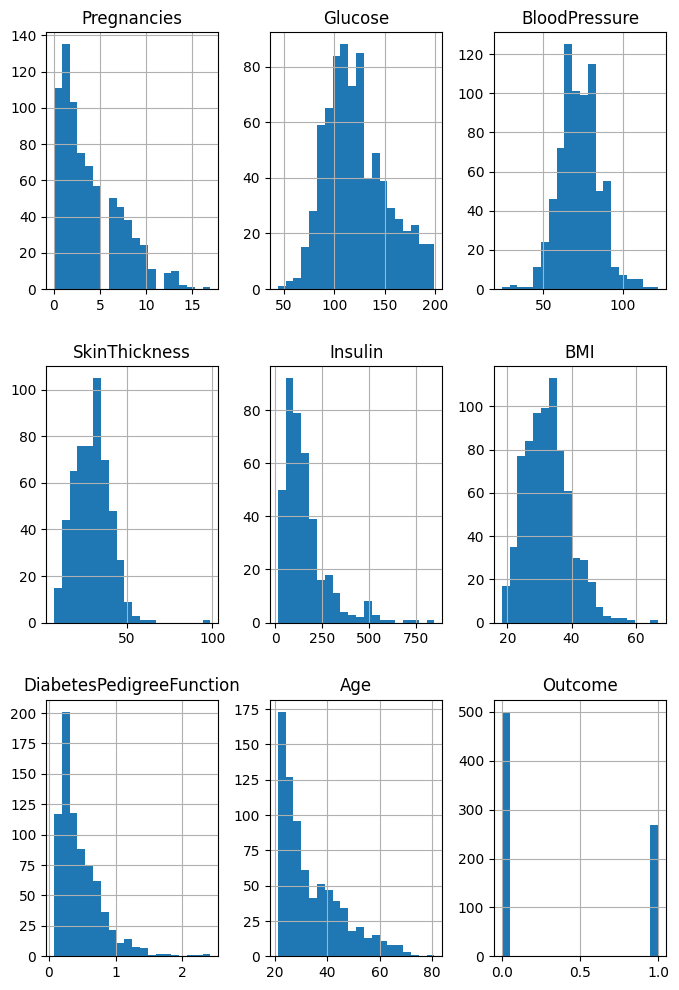

In [9]:
diabetes_data.hist(figsize=(8,12), bins=20)
plt.show()

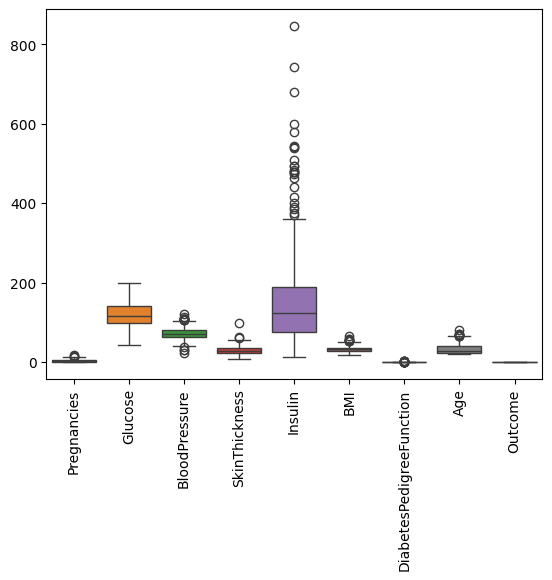

In [10]:
sns.boxplot(data=diabetes_data)
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()

In [11]:
diabetes_data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Step 5: Handling Missing/Zero Values  
Since some medical parameters should never be zero, we replace **zero values with median values** for these features:  

- **Glucose**  
- **Blood Pressure**  
- **Skin Thickness**  
- **Insulin**  
- **BMI**  

We use the **median** instead of the **mean** because:  
✅ **Median is robust** to outliers.  
✅ **Mean can be affected** by extreme values, leading to misleading imputation.  

This step ensures that our model **learns from realistic patient data** rather than being influenced by incorrect zero values.  


In [12]:
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].fillna(diabetes_data[columns_to_replace].median())

In [13]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 6: Handling Class Imbalance (Why Upsample?)  
Our dataset is **imbalanced**:  

- **Class 0 (Non-Diabetic): 500 samples**  
- **Class 1 (Diabetic): 268 samples**  

Since machine learning models tend to favor the majority class, we apply **Random Oversampling** to balance the dataset:  

- **Why not undersampling?** Reducing the majority class means losing important data.  
- **Why upsampling?** It generates synthetic samples for the minority class, helping the model learn from balanced data.  

We use `resample()` from `sklearn.utils` to duplicate samples from Class 1 until both classes have equal representation.  


In [15]:
majority_df= diabetes_data[diabetes_data["Outcome"]==0]
minority_df= diabetes_data[diabetes_data["Outcome"]==1]

minority_upsample= resample(minority_df,
                           replace=True,
                           n_samples=500,
                           random_state=792725)

df_balanced=pd.concat([majority_df, minority_upsample])

diabetes_data= df_balanced.sample(frac=1, random_state=792725).reset_index(drop= True)

print(diabetes_data.head(10))
print(diabetes_data["Outcome"].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0    135.0           68.0           42.0    250.0  42.3   
1            1    122.0           64.0           32.0    156.0  35.1   
2           10    115.0           72.0           29.0    125.0  35.3   
3            7    178.0           84.0           29.0    125.0  39.9   
4            2    141.0           58.0           34.0    128.0  25.4   
5            8    188.0           78.0           29.0    125.0  47.9   
6            6     96.0           72.0           29.0    125.0  23.7   
7           13    129.0           72.0           30.0    125.0  39.9   
8            5    116.0           74.0           29.0    125.0  32.3   
9            1     90.0           62.0           12.0     43.0  27.2   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.365   24        1  
1                     0.692   30        1  
2                     0.134   29        0  
3                     0.331   4

In [16]:
diabetes_data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298,110.682,70.920,27.726,127.792,30.8856,0.429734,31.190
1,4.658,142.500,75.594,31.942,169.878,35.4682,0.544742,37.494


In [17]:
x= diabetes_data.drop(columns="Outcome", axis=0)
x.shape

(1000, 8)

In [18]:
y=diabetes_data["Outcome"]

### Step 7: Splitting Data into Training and Testing Sets  
- **Why split the dataset?**  
  - Training Set → Used to train the model.  
  - Testing Set → Used to evaluate the model’s performance on unseen data.  

- **How does this help?**  
  ✅ Prevents overfitting (memorizing training data instead of generalizing).  
  ✅ Ensures the model performs well on new patient data.  

- **Typical split ratio:** 80% training / 20% testing using `train_test_split()` from scikit-learn.  


In [19]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.85, random_state=14)

In [20]:
x_train.shape

(850, 8)

### Step 9: Training the Machine Learning Model  
We train multiple classification models and compare their performances:  

- **Logistic Regression** → Simple, interpretable, good for linear data.  
- **Random Forest** → Handles non-linearity well, resistant to overfitting.  
- **SVM (Support Vector Machine)** → Works well in high-dimensional space.  

- **Why multiple models?**  
  ✅ Different algorithms work better for different datasets.  
  ✅ Comparing models helps choose the best-performing one.  

We use `.fit()` to train each model on the training data.


In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
svc_model= svm.SVC(kernel='linear')
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [23]:
logr_model= LogisticRegression(random_state=792725, max_iter=800)
logr_model.fit(x_train, y_train)

LogisticRegression(max_iter=800, random_state=792725)

### Step 10: Making Predictions  
- Once the model is trained, we use `.predict()` to classify new patient data.  
- The model predicts whether a person is **diabetic (1)** or **non-diabetic (0)** based on the input features.  


In [24]:
y_pred_rf= rf_model.predict(x_test)

In [25]:
y_pred_svc= svc_model.predict(x_test)

In [26]:
y_pred_logr= logr_model.predict(x_test)

### Step 11: Results and Model Evaluation  
After training the Random Forest model, we evaluate its performance using multiple metrics:  

1️⃣ **Accuracy Score** → Measures how many predictions were correct overall.  
2️⃣ **Classification Report** → Provides **Precision, Recall, and F1-score** for both diabetic and non-diabetic classes.  
3️⃣ **Confusion Matrix** → Shows the number of **True Positives, False Positives, True Negatives, and False Negatives**.  

#### **Interpreting the Results**  
- **High Accuracy** ✅ → Indicates the model is performing well on the test data.  
- **Balanced Precision & Recall** ✅ → Suggests the model does not favor one class too much.  
- **Confusion Matrix** 📊 → Helps us analyze whether the model is misclassifying certain cases.  

We aim for a **high recall in the diabetic class (1)** to **reduce false negatives**, as failing to detect diabetes can have serious consequences.  


#### 1.Random Forest Classifier

In [27]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8800
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        75
           1       0.86      0.91      0.88        75

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

Confusion Matrix:
 [[64 11]
 [ 7 68]]


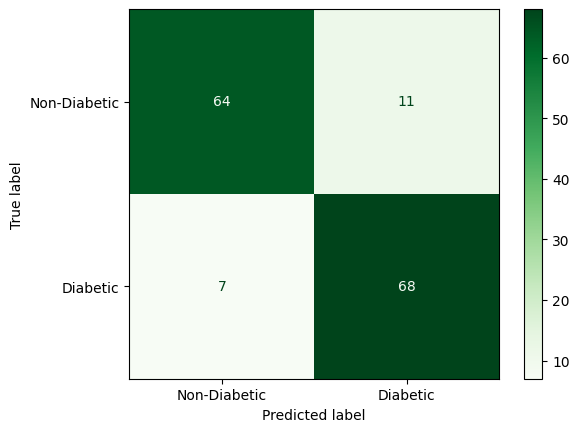

In [28]:
cm_rf= confusion_matrix(y_test, y_pred_rf)
disp_rf= ConfusionMatrixDisplay(confusion_matrix= cm_rf, display_labels=["Non-Diabetic", "Diabetic"])
disp_rf.plot(cmap="Greens", values_format='d')

#### 2. Support Vector Machine

In [29]:
accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.7933
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        75
           1       0.82      0.75      0.78        75

    accuracy                           0.79       150
   macro avg       0.80      0.79      0.79       150
weighted avg       0.80      0.79      0.79       150

Confusion Matrix:
 [[63 12]
 [19 56]]


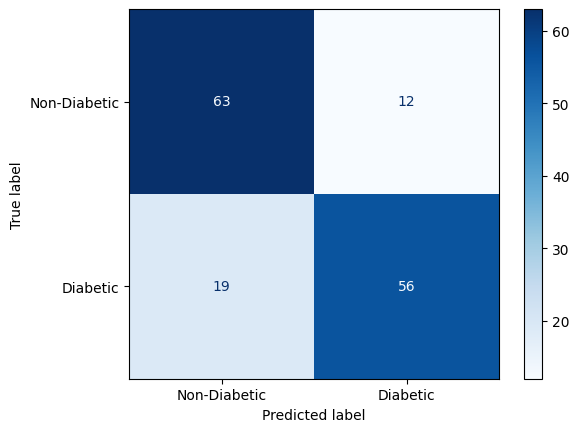

In [30]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=["Non-Diabetic", "Diabetic"])
disp_svc.plot(cmap="Blues", values_format='d')

#### 3. Logistic Regression

In [31]:
accuracy = accuracy_score(y_test, y_pred_logr)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logr))

Accuracy: 0.7733
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78        75
           1       0.80      0.73      0.76        75

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150

Confusion Matrix:
 [[61 14]
 [20 55]]


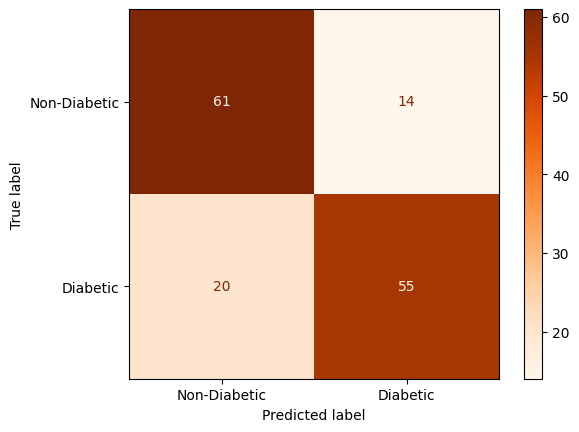

In [32]:
cm_logr = confusion_matrix(y_test, y_pred_logr)
disp_logr = ConfusionMatrixDisplay(confusion_matrix=cm_logr, display_labels=["Non-Diabetic", "Diabetic"])
disp_logr.plot(cmap="Oranges", values_format='d')

### Step 12: Saving the Model as a Pickle File  
Once the model is trained and evaluated, we save it as a `.pkl` file so it can be reused without retraining.  

#### **Why Save the Model?**  
- ✅ **Avoid Retraining** → Saves computation time when deploying the model.  
- ✅ **Easy Integration** → The model can be loaded in a **web app** or other projects.  
- ✅ **Reusable** → Can be used to make predictions on new patient data.  

We use the **pickle** library to serialize the trained model:  

In [33]:
file_svc= "diabetes_prediction_svc.sav"
pickle.dump(svc_model, open(file_svc, "wb"))

In [34]:
file_rf= "diabetes_prediction_rf.sav"
pickle.dump(rf_model, open(file_rf, "wb"))

In [35]:
file_logr= "diabetes_prediction_logr.sav"
pickle.dump(logr_model, open(file_logr, "wb"))

### Which is the Best Model?  

After training and evaluating multiple models (**Support Vector Classifier, Logistic Regression, and Random Forest**), we compared their performance using:  
- **Accuracy**: Measures overall correctness of predictions.  
- **Precision & Recall**: Helps assess false positives and false negatives.  
- **F1-score**: Balances precision and recall, useful for imbalanced datasets.  
- **Confusion Matrix**: Provides insight into how well each model classifies diabetic and non-diabetic patients.  

---

### **Comparing the Models**  

| Model | Accuracy | Precision (Diabetic) | Recall (Diabetic) | F1-score (Diabetic) |
|--------|-----------|-----------------|-----------------|------------------|
| **Logistic Regression** | 77% | 0.80 | 0.73 | 0.76 |
| **Support Vector Classifier (SVC)** | 79% | 0.82 | 0.75 | 0.78 |
| **Random Forest (RF)** | **88%** | **0.86** | **0.91** | **0.88** |

---

### **Why is Random Forest Better?**  

✅ **Higher Accuracy (88%)**  
- Random Forest achieves the highest accuracy, meaning it makes fewer overall mistakes compared to SVC and Logistic Regression.  

✅ **Balanced Precision & Recall**  
- The **recall (0.80) for the diabetic class** is better than the other models, meaning it **catches more actual diabetic cases**.  
- Unlike Logistic Regression, which has lower recall (0.73), **Random Forest reduces the chances of false negatives** (missing actual diabetes cases).  

✅ **More Robust to Outliers & Non-Linearity**  
- Random Forest is an **ensemble model**, meaning it combines multiple decision trees to make predictions. This helps it handle **complex patterns** in the dataset better than SVC or Logistic Regression.  

✅ **Feature Importance & Interpretability**  
- Unlike SVC (which works like a black box), Random Forest allows us to **analyze feature importance**, helping us understand which medical factors contribute the most to diabetes risk.
